# Data Preparation and analysis 
# Project 2 - Car Analysis

## Intro
The following is an analysis of a vehicle sale dataset, available on Kaggle. The data was collected Indian automotive reatiler Car Dekho. The dataset contains 8 variables: model name, year, price, kilometers driven, fuel type, seller type, transmission type and owner. Year, price and kilometers driven are numeric variables, while the others are categorical. There are 4340 samples of vehicles in the data set. For each of these variables we wanted to take a deep dive to uncover any patterns or trends. To accomplish this, we employed a variety of statisical methods and data visualization tools. We analyzed the distribution of values throughout the set, searched for outliers and extereme values, evaluated central tendency and answered several questions.

 - Of the cars on the market, what year do they tend to be from?
 - Which car models are more expensive?
 - Which cars are driven for longer?
 - How many owners has the typical car had?
 - What fuel types are most dominant in cars on the market?
 - Are certain transmission types more prevalent in certain manufacturers? 

In the cells below we address these questions and more. While we label our analysis as 'exploratory', we hope readers can come away more informed about the different aspects of cars and the interaction between them.


Helgestad, Max J. helg1470@stthomas.edu |
Lewis, Leo F. lewi9663@stthomas.edu |
Epinette, Hayden C. epin1811@stthomas.edu |
Carmody, Doug H. doug.carmody@stthomas.edu |
Trabing, Drew. trab1688@stthomas.edu

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")

In [4]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
df["price_usd"] = df.selling_price.apply(lambda x : x * 0.012) # convert to price in $USD using conversion rate from 9:59 4/4/2024
df.price_usd

0         720.000
1        1620.000
2        7200.000
3        3000.000
4        5400.000
          ...    
4335     4919.988
4336     4919.988
4337     1320.000
4338    10380.000
4339     2700.000
Name: price_usd, Length: 4340, dtype: float64

In [163]:
print("Dataset Description")
df.describe()

Dataset Description


,year,selling_price,km_driven,price_usd
count,4340.000000,4.340000e+03,4340.000000,4340.000000
mean,2013.090783,5.041273e+05,66215.777419,6049.527741
std,4.215344,5.785487e+05,46644.102194,6942.584834
min,1992.000000,2.000000e+04,1.000000,240.000000
25%,2011.000000,2.087498e+05,35000.000000,2504.997000
50%,2014.000000,3.500000e+05,60000.000000,4200.000000
75%,2016.000000,6.000000e+05,90000.000000,7200.000000
max,2020.000000,8.900000e+06,806599.000000,106800.000000


In [7]:
df["base_model"] = df.name.apply(lambda x : x.split(' ')[0])
df['base_model']

0        Maruti
1        Maruti
2       Hyundai
3        Datsun
4         Honda
         ...   
4335    Hyundai
4336    Hyundai
4337     Maruti
4338    Hyundai
4339    Renault
Name: base_model, Length: 4340, dtype: object

In [8]:
df.shape

(4340, 10)

In [9]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'price_usd', 'base_model'],
      dtype='object')

# Exploring Year Variable

The first step to exploring the "year" variable in the dataset is to decode the cryptic variable description: "Year of the car when it was bought".

This could mean:

1. The "model year" of the car, which would not change based on when it was bought.

2. The year of the sale, which would change when it was bought. 

### Year - Initial Exploration

Text(0.5, 0.98, 'Figure 1')

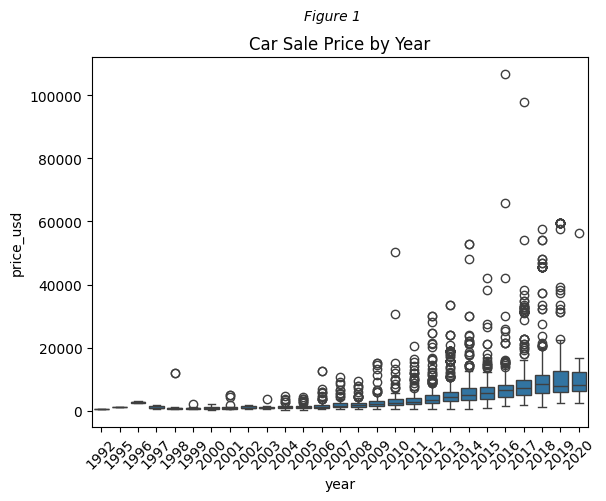

In [25]:
p = sns.boxplot(x='year',y='price_usd', data=df)
plt.xticks(rotation=45)
trash = p.set_title('Car Sale Price by Year')
plt.suptitle("Figure 1", style = 'italic', size=10)

In [162]:
print("Price by Year")
display(df.groupby(['year'])['price_usd'].mean())

Price by Year


year
1992      600.000000
1995     1140.000000
1996     2700.000000
1997     1116.000000
1998     2568.000000
1999      882.000000
2000      978.000000
2001     1411.798800
2002     1088.571429
2003     1038.782609
2004     1460.999714
2005     1308.156282
2006     1893.599345
2007     1953.940209
2008     2090.415972
2009     2754.776829
2010     3236.137538
2011     3523.659985
2012     4459.546236
2013     5817.612155
2014     6278.778768
2015     6347.315458
2016     7300.369109
2017     9226.918069
2018    10929.245508
2019    12708.245785
2020     9821.749500
Name: price_usd, dtype: float64

By plotting (Fig. 1) and aggregating (Price by Year) the spread of the sale price by year, we can see that this variable is almost certainly the *model year* -- meaning that the sale price is reflecting the *age* of the car, not *when* the car was sold. 

If the "year" variable was actually referring to the sale date of the car, it would imply that the car sales in the Car Dekho platform had gone up ~10x in price over 18 years, which seems implausible. 

### Year - Center

Text(0.5, 0.98, 'Figure 2')

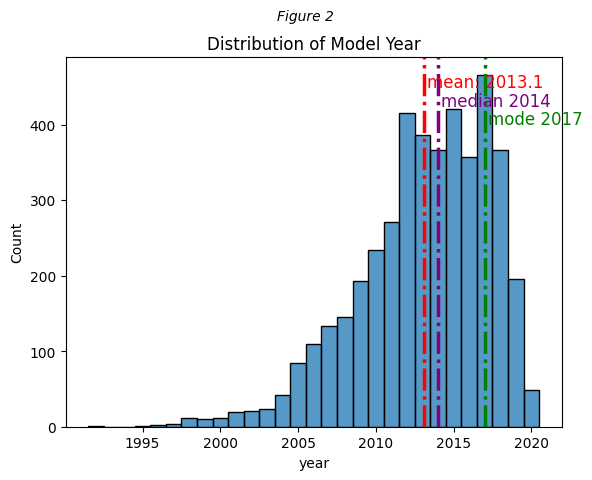

In [24]:
mode = df["year"].mode()[0]
mean = df["year"].mean()
median = df["year"].median()

p = sns.histplot(data=df,x="year",binwidth=1, binrange=(1991.5,2020.5))
plt.axvline(mean, c= "red", lw =2.5,ls ='-.')
plt.text(mean+.2,450,"mean: " + str(round(mean,1)),c="red",fontsize=12)

plt.axvline(median, c= "purple", lw =2.5,ls ='-.')
plt.text(median+.2,425,"median " + str(round(median)),c="purple",fontsize=12)

plt.axvline(mode, c= "green", lw =2.5,ls ='-.')
plt.text(mode+.2,400,"mode " + str(round(mode)),c="green",fontsize=12)
trash = p.set_title("Distribution of Model Year")
plt.suptitle("Figure 2", style = 'italic', size=10)

The year has a mean of 2013.1, a median of 2014, and a mode of 2017 (see Fig. 2).

### Year - Spread

In [12]:
df["year"].std()

4.215343939724197

The spread of the year variable is 2020 - 1992 = 28 and the standard deviation of the year distribution is 4.2. The distribution itself can be examined above (Fig. 2).

### Year - Skew
The year variable is left skewed and does not appear to be normally distributed. The distribution itself can be examined above (Fig. 2).

### Year - Clusters/Modality
I would call this distribution unimodal with a mode of 2017, but it does have spikes in 2012 and 2015 that could be explained if there were a lot of cars produced in those years. The distribution itself can be examined above (Fig. 2).

### Year - Extreme Values

In [13]:
IQR = np.quantile(df["year"], 0.75) - np.quantile(df["year"], 0.25)
print(IQR*1.5)

df.shape
df[(df["year"] <= 2004)].shape

df[(df["year"] <= 2004)].shape[0] / df.shape[0]


7.5


0.03387096774193549

Given a standard deviation of 4.2, there would be no outliers to the right side of the distribution, since the max year is 2020, which is less than 2013.1 + 4.2*2. 

However, there would be plently of outliers to the left side of the distribution, which would encompass all years 2004 and under (2013.1 - 4.2*2 = 2004.7). This would amount to 3.3% of the total observations (Fig. 3).

Text(0.5, 0.98, 'Figure 3')

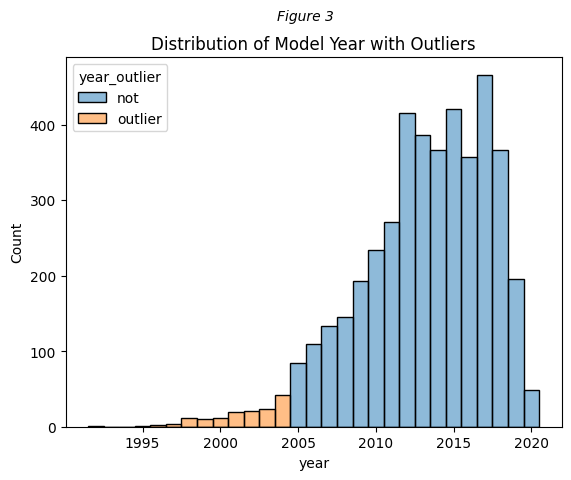

In [27]:
df["year_outlier"] = (df["year"] <= 2004).map({True: "outlier",False: "not"})
p = sns.histplot(data=df,x="year",binwidth=1, binrange=(1991.5,2020.5), hue = "year_outlier")
trash = p.set_title("Distribution of Model Year with Outliers")
plt.suptitle("Figure 3", style = 'italic', size=10)

### Year -- Model Trend

Text(0.5, 1.1, 'Figure 4')

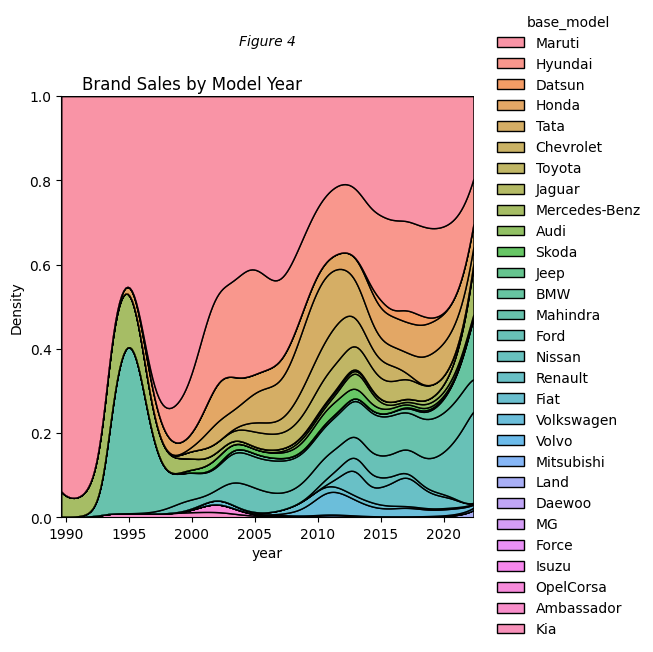

In [37]:
p = sns.displot(data=df,x="year",hue="base_model", kind = "kde", multiple = "fill", clip = (0,None), warn_singular = False)
trash = p.figure.suptitle("Brand Sales by Model Year", x = 0.3, y=1)
plt.rcParams['axes.titley'] = 1.1    # y is in axes-relative coordinates.
plt.title("Figure 4", style = 'italic', size=10)


By plotting the base model sales against the year variable (Fig. 4), we can see that from *older* model years there have been a huge proportion of Maruti cars sold, whereas the sales among *newer* model years are more evenly distributed across the different brands. 

# Exploring the "km_driven" Variable

The "km_driven" (kilometers driven) variable from this dataset can inform us about multiple things, including:
1. Mean/median of kilometers driven a car has
2. What range of km_driven are most cars today
3. Which car brands on the road have the highest mean km_driven

### Extreme Values
Right away, we can point out some extreme values in this dataset for the km_driven variable.

In [161]:
print("Highest KM Driven")
df.sort_values("km_driven", ascending=False).head(5)

Highest KM Driven


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,price_usd,base_model,year_outlier,fuel_adjusted
1243,Maruti Swift VXI BSIII,2009,250000,806599,Petrol,Dealer,Manual,First Owner,3000.0,Maruti,not,Petrol
525,Maruti SX4 S Cross DDiS 320 Delta,2016,665000,560000,Diesel,Dealer,Manual,First Owner,7980.0,Maruti,not,Diesel
4184,Maruti SX4 S Cross DDiS 320 Delta,2016,665000,560000,Diesel,Dealer,Manual,First Owner,7980.0,Maruti,not,Diesel
3679,Toyota Innova 2.5 G (Diesel) 7 Seater BS IV,2006,400000,400000,Diesel,Individual,Manual,Third Owner,4800.0,Toyota,not,Diesel
2394,Toyota Innova 2.5 V Diesel 8-seater,2009,350000,350000,Diesel,Individual,Manual,First Owner,4200.0,Toyota,not,Diesel


The above is the dataset sorted from highest to lowest for km_driven. One vehicle has been driven for nearly 250,000 kilometers more than the next highest value of 560,000. The two vehicles at 560,000 km are 160,000 km higher than the next vehicle, then the data begins to come together.

In [17]:
no_km_outliers_df = df.sort_values("km_driven", ascending=False).iloc[3:]

### Center & Spread

In [18]:
print("Mean kilometers driven for cars in the dataset: ", df.km_driven.mean())
print("Median kilometers driven for cars in the dataset: ", df.km_driven.median())
print("Mode kilometers driven for cars in the dataset: ", df.km_driven.mode()[0])
print("Range of kilometers driven: ", df.km_driven.max() - df.km_driven.min())

Mean kilometers driven for cars in the dataset:  66215.77741935484
Median kilometers driven for cars in the dataset:  60000.0
Mode kilometers driven for cars in the dataset:  70000
Range of kilometers driven:  806598


Text(0.5, 0.98, 'Figure 5')

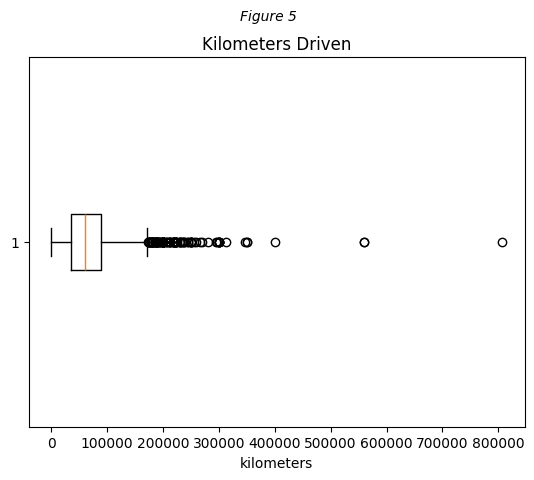

In [43]:
plt.boxplot(df.km_driven, vert=0)
plt.rcParams['axes.titley'] = 1    # y is in axes-relative coordinates.
_ = plt.title("Kilometers Driven")
_ = plt.xlabel("kilometers")
plt.suptitle("Figure 5", style = 'italic', size=10)

In [20]:
Q3 = np.quantile(df.km_driven, 0.75)
Q1 = np.quantile(df.km_driven, 0.25)
IQR = Q3 - Q1
print("Interquartile Range for KM Driven: ", IQR)

Interquartile Range for KM Driven:  55000.0


### Skew & Cluster/Modality

Standard Deviation for KM Driven:  46644.102193620885
Variance of KM Driven:  2175672269.448949


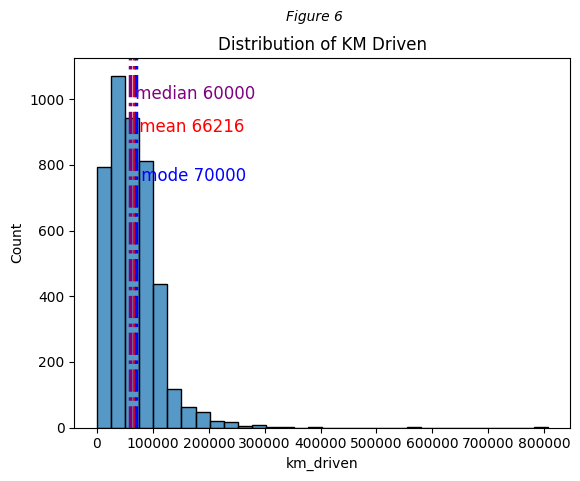

In [45]:
km_median = df.km_driven.median()
km_mean = df.km_driven.mean()
km_mode = df.km_driven.mode()[0]
km_histo = sns.histplot(data=df, x="km_driven", binwidth=25000)
km_histo.set_title("Distribution of KM Driven")
plt.axvline(km_median, c="purple", lw=2.5, ls ='-.')
plt.text(km_median, 1000 ," median " + str(round(km_median)),c="purple", fontsize=12)
plt.axvline(km_mean, c="red", lw=2.5, ls ='-.')
plt.text(km_mean, 900 ," mean " + str(round(km_mean)), c="red", fontsize=12)
plt.axvline(km_mode, c="blue", lw=2.5, ls ='-.')
plt.text(km_mode, 750 ," mode " + str(round(km_mode)), c="blue", fontsize=12)
plt.suptitle("Figure 6", style = 'italic', size=10)
print("Standard Deviation for KM Driven: ", df.km_driven.std())
print("Variance of KM Driven: ", df.km_driven.var())

The data for km_driven is highly sweked to the right, with a majority of values being at the left of the histogram (Fig. 6). Of the bins in the histogram above the one with the highest number of cars is the km range of 25,000 to 50,000.

### KM Driven By Brand
An interesting thing to look at would be which brand's vehicles tend to be the ones that can last a large amount of kilometers driven. This is a metric often used to measure the reliability of a vehicle. Let's look at the top 25% of values in the km_driven and find the brands with the highest mean km_driven.

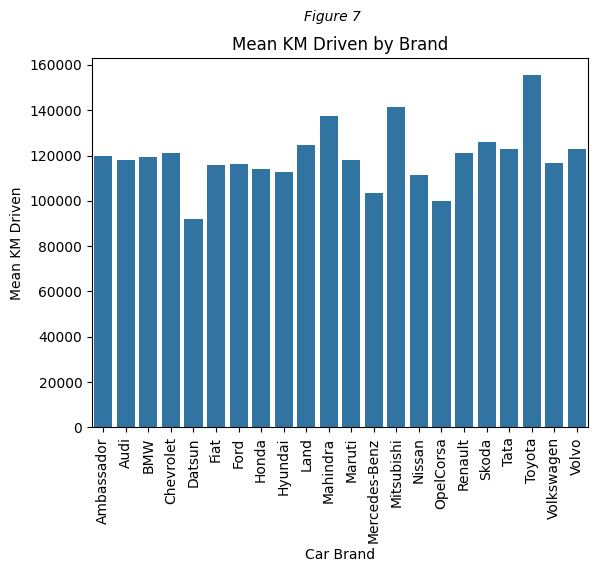

In [46]:
q75 = df.km_driven.quantile(q=0.75)
q75_km_driven = df[df.km_driven.ge(q75)]
q75_km_driven_by_brand = q75_km_driven[["base_model", "km_driven"]]
brand_means = q75_km_driven_by_brand.groupby("base_model").mean().reset_index()
bar_chart = sns.barplot(x=brand_means.base_model, y=brand_means.km_driven)
plt.suptitle("Figure 7", style = 'italic', size=10)
_ = plt.xticks(rotation=90)
_ = plt.xlabel("Car Brand")
_ = plt.ylabel("Mean KM Driven")
_ = plt.title("Mean KM Driven by Brand")


Of the cars in the dataset with the most miles driven, it look that Toyota, Mitsubishi, and Mahindra are the three brands that average the highest kilometers driven (Fig. 7).

# Exploring Price USD

This variable was initially listed in the Indian ruppe but I took the liberty of converting it to USD. Seeing car prices listed in millions of dollars was strange, I had no frame of reference for extreme values. After converting, it was easier to recognize extreme values. 

### Initial details/Center
The average car price was \\$6,049 while the median value was \\$4,200 and the mode value \\$3600. The most expensive car was \\$106800 and the cheapest \\$240.  
The fact that the average car price is greater than the median indicates a skew in the right direction. The high standard deviation in price suggests that the value are not clustered together very closely.

In [49]:
print("Price Table")
df.price_usd

Price Table


0         720.000
1        1620.000
2        7200.000
3        3000.000
4        5400.000
          ...    
4335     4919.988
4336     4919.988
4337     1320.000
4338    10380.000
4339     2700.000
Name: price_usd, Length: 4340, dtype: float64

In [50]:
print("Price Statistics")
print("Mean price:", round(df.price_usd.mean(), 2))
print("Median price:", df.price_usd.median())
print("Mode of price:",df.price_usd.mode()[0])
print("Standard Dev:", round(df.price_usd.std(), 2))
print("Max price:", round(df.price_usd.max(), 2))
print("Min price:", round(df.price_usd.min(), 2))
print("Range:", df.price_usd.max() - df.price_usd.min())

Price Statistics
Mean price: 6049.53
Median price: 4200.0
Mode of price: 3600.0
Standard Dev: 6942.58
Max price: 106800.0
Min price: 240.0
Range: 106560.0


In [51]:
print("Price Counts")
df.price_usd.value_counts()

Price Counts


3600.000     162
3000.000     125
4200.000     122
6600.000     107
7200.000     103
            ... 
25200.000      1
9947.988       1
13428.000      1
8952.000       1
10380.000      1
Name: price_usd, Length: 445, dtype: int64

The interquartile range falls between these two values:

In [52]:
print("Price IQR")
middle_prices = df.price_usd.quantile([0.25,0.75])
middle_prices

Price IQR


0.25    2504.997
0.75    7200.000
Name: price_usd, dtype: float64

### Skew/Spread
With the plots below we can confirm that there is positive (right) skew in the price data (Fig. 8). This makes sense, as price will never drop below zero and thus can only grow to extreme degrees.

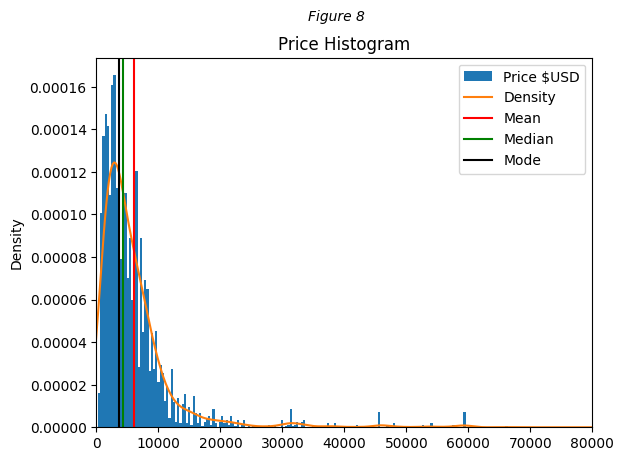

In [63]:
plt.ticklabel_format(style='plain')
ax = df.price_usd.plot.hist(bins=300, density=True, label='Price $USD')
df.price_usd.plot.density(ax=ax, label='Density')
ax.set_xlim([-10, 80000])
ax.axvline(df.price_usd.mean(), c="red", label='Mean')
ax.axvline(df.price_usd.median(), c="green", label='Median')
ax.axvline(df.price_usd.mode()[0], c="black", label='Mode')
plt.legend(loc="upper right")
plt.suptitle("Figure 8", style = 'italic', size=10)
_ = plt.title("Price Histogram")

### Same graph as above but restricted to the middle 50%.

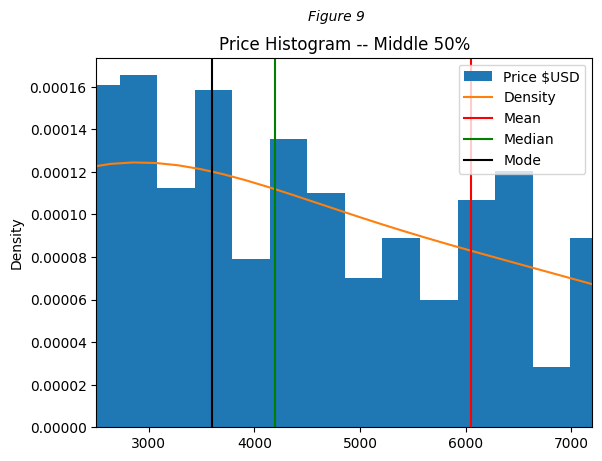

In [64]:
plt.ticklabel_format(style='plain')
ax = df.price_usd.plot.hist(bins=300, density=True, label='Price $USD')
df.price_usd.plot.density(ax=ax, label='Density')
ax.set_xlim(middle_prices.to_list())
ax.axvline(df.price_usd.mean(), c="red", label='Mean')
ax.axvline(df.price_usd.median(), c="green", label='Median')
ax.axvline(df.price_usd.mode()[0], c="black", label='Mode')
plt.legend(loc="upper right")
plt.suptitle("Figure 9", style = 'italic', size=10)
_ = plt.title("Price Histogram -- Middle 50%")

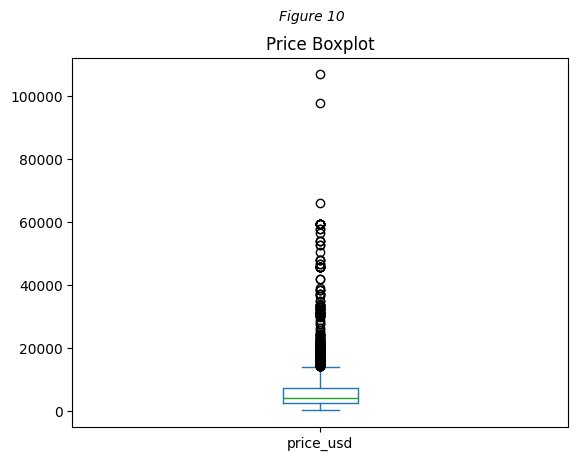

In [65]:
df.price_usd.plot.box()
plt.suptitle("Figure 10", style = 'italic', size=10)
_ = plt.title("Price Boxplot")

### Clusters
## Distribution of car prices in USD by car model
From the plot below (Fig. 11), we can see that most of the extreme prices from the data set can be attributed to a select number of model types. Audi, Mercedez & BMW are being sold for the highest prices. Most other cars are typically sold for < $30k. 

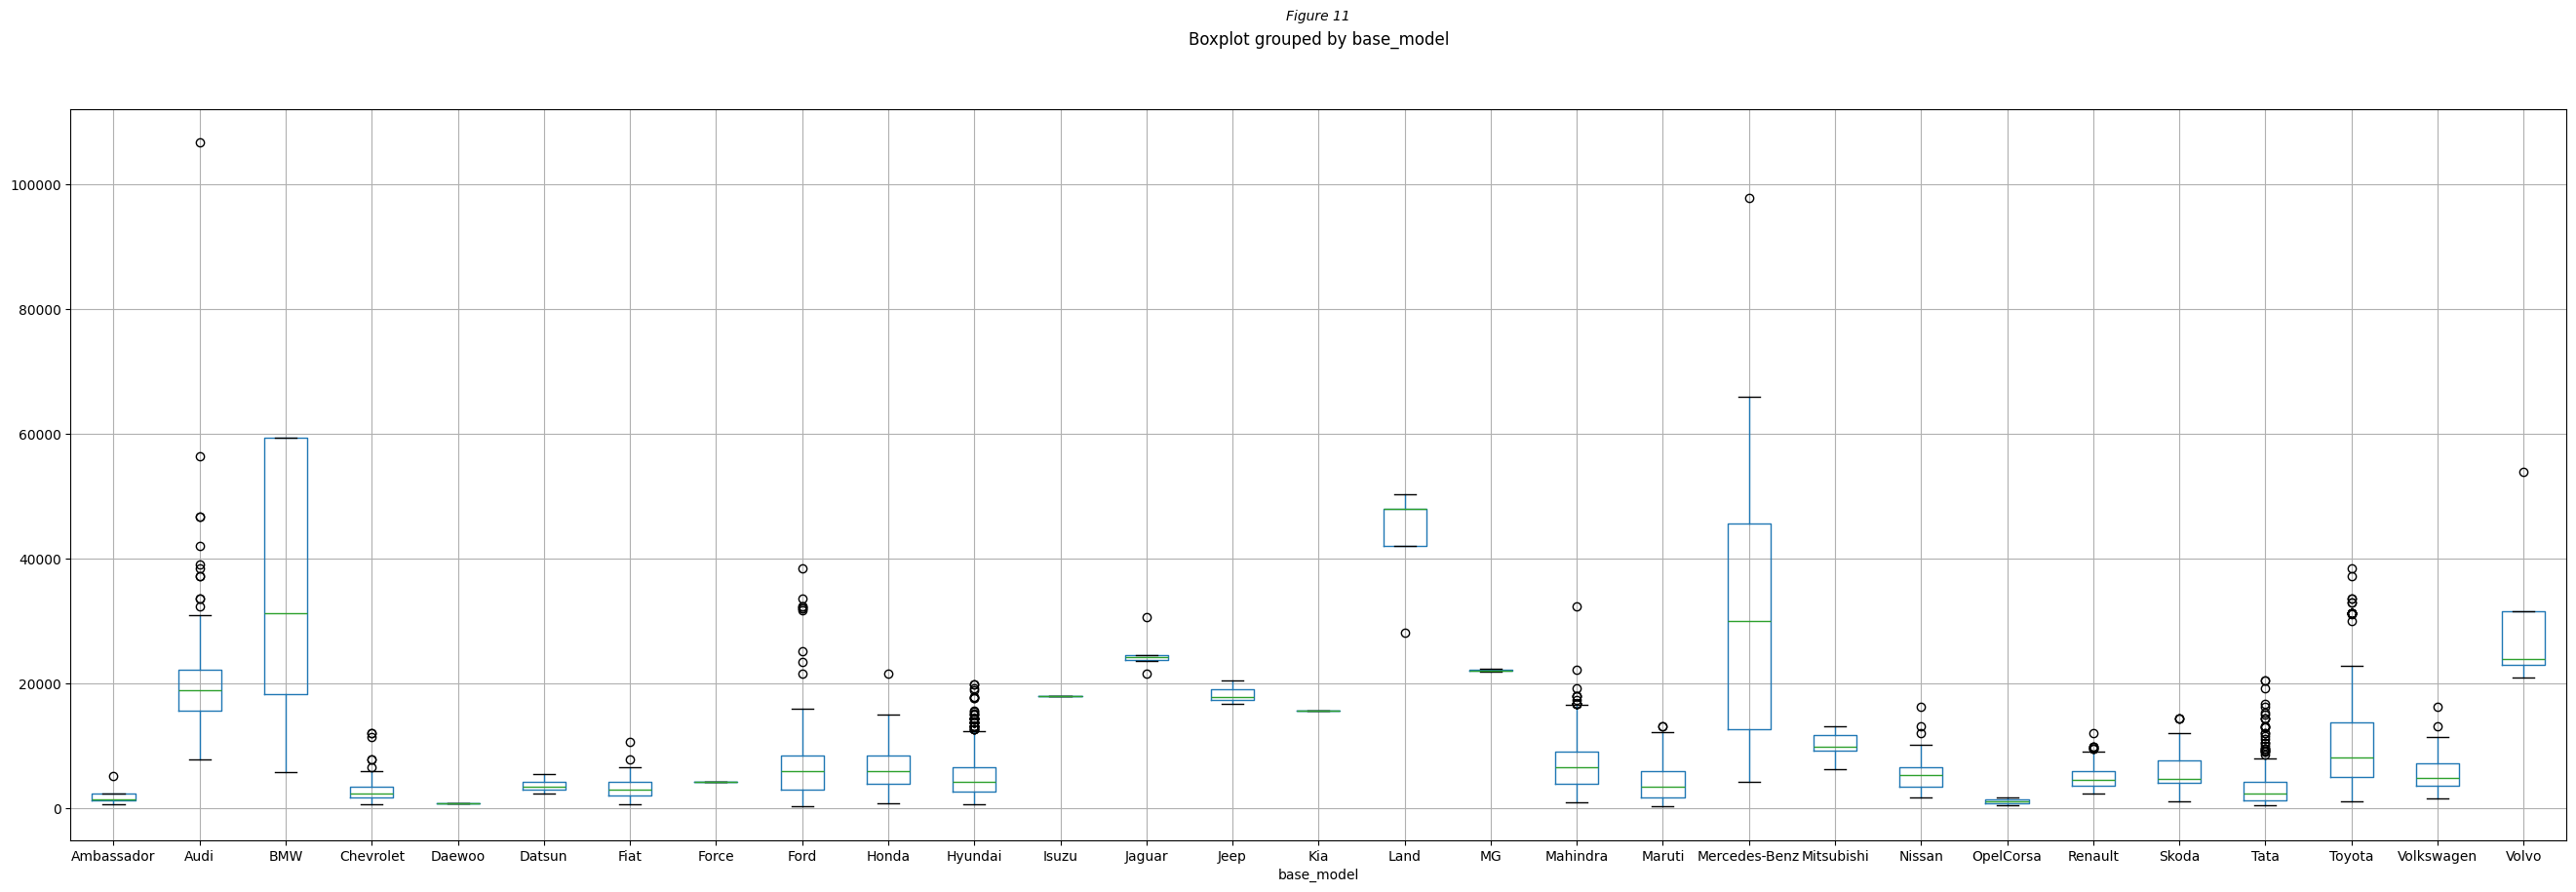

In [76]:
df.boxplot(by='base_model', column='price_usd', figsize=(32,10))
#plt.suptitle("Figure 10", style = 'italic', size=10)
plt.rcParams['axes.titley'] = 1.11    # y is in axes-relative coordinates.
_ = plt.title("Figure 11", style = 'italic', size=10)

# Association between price and model year
In the below cell (Fig. 12), after filtering to the middle 50% of prices, we can observe a trend by year. As year grows, the car price tends to go up. This makes sense intuitively, as new cars are typically more expensive than older cars or older models.

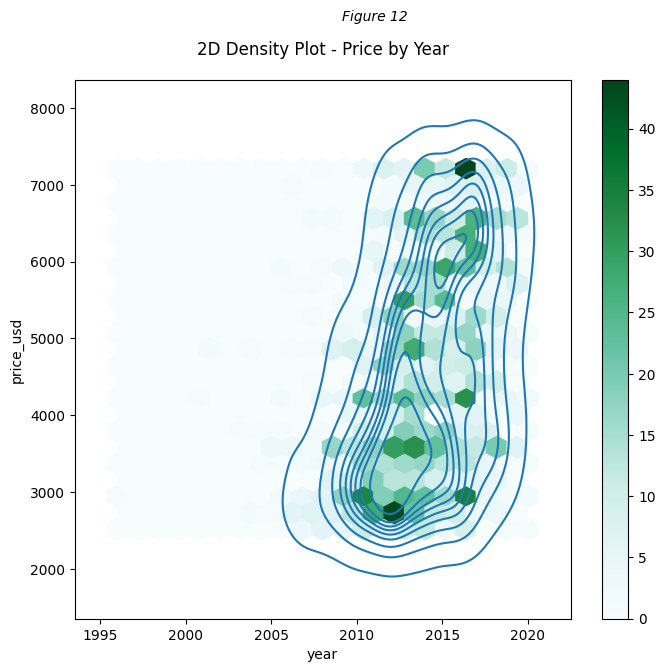

In [89]:
df_filtered_price = df[df.price_usd.between(middle_prices[0.25], middle_prices[0.75], inclusive='both')]
ax = df_filtered_price.plot.hexbin(x='year', y='price_usd', gridsize=20, figsize=(8,7))
sns.kdeplot(data=df_filtered_price, x='year', y='price_usd')
_ = plt.title("2D Density Plot - Price by Year")
_ = plt.suptitle("Figure 12", style = 'italic', size=10)

In [90]:
print("Price by Year Correlation")
df[["year", "price_usd"]].corr()

Price by Year Correlation


,year,price_usd
year,1.000000,0.413922
price_usd,0.413922,1.000000


# Exploring Owner
From the cell below (Owner Variable Decription) we can see there are 5 categories for the owner variable. This data set must consist of sales of used cars, or data post sale, as there is no 0th owner or no-owner cars. Further, 'first owner' dominates the data, occuring 2832 times out of 4340 rows. 'second owner' and 'third owner' have a small presence but 'fourth and above' and 'test' are not present to any significant degree (Owner Counts).

In [91]:
print("Owner Variable Description")
df.owner.describe()

Owner Variable Description


count            4340
unique              5
top       First Owner
freq             2832
Name: owner, dtype: object

In [92]:
print("Owner Counts")
df.owner.value_counts()

Owner Counts


First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

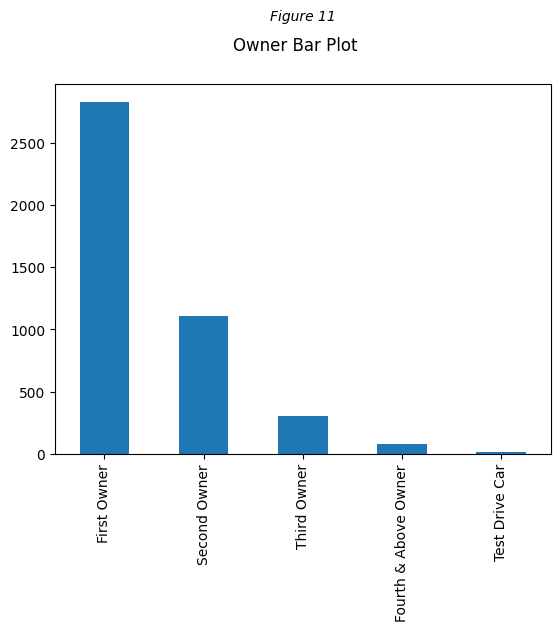

In [100]:
df.owner.value_counts().plot.bar()
plt.rcParams['axes.titley'] = 1.15    # y is in axes-relative coordinates.
_ = plt.title("Figure 13", style = 'italic', size=10)
_ = plt.suptitle("Owner Bar Plot")

The distribution of owners remains predominantly grouped in 'first owner' (Fig. 13) even when analyzed on the middle 50% of price cars (Fig. 14).

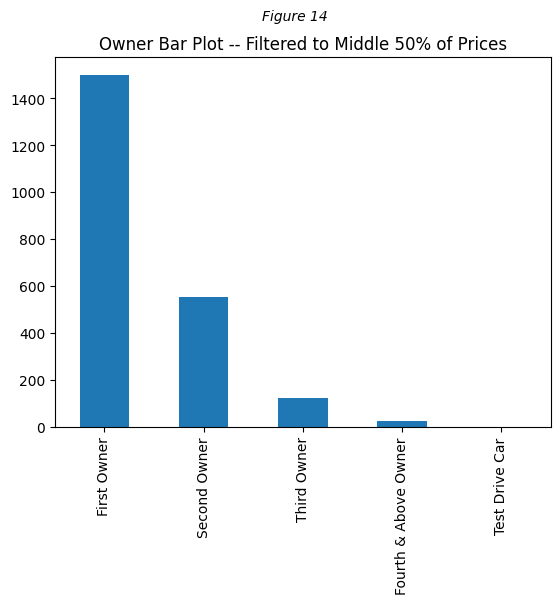

In [110]:
df_filtered_price.owner.value_counts().plot.bar()
plt.rcParams['axes.titley'] = 1    # y is in axes-relative coordinates.
_ = plt.title("Owner Bar Plot -- Filtered to Middle 50% of Prices")
_ = plt.suptitle("Figure 14", style = 'italic', size=10)

Here we can see that later owner cars tend to have more km_driven (Fig.15). The median and range increases as owner does. 

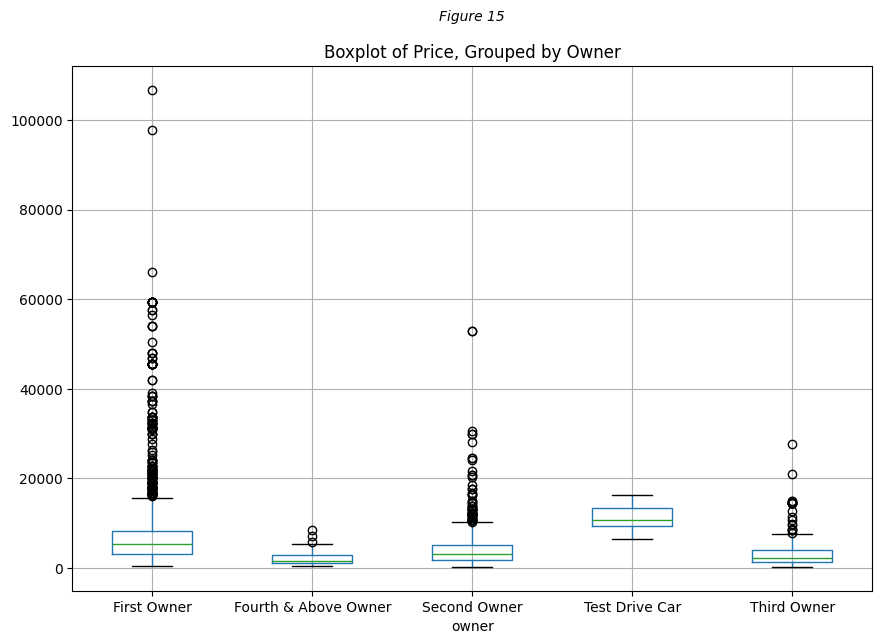

In [109]:
df.boxplot(by='owner', column='price_usd', figsize=(10,7))
_ = plt.title("Boxplot of Price, Grouped by Owner")
_ = plt.suptitle("Figure 15", style = 'italic', size=10)

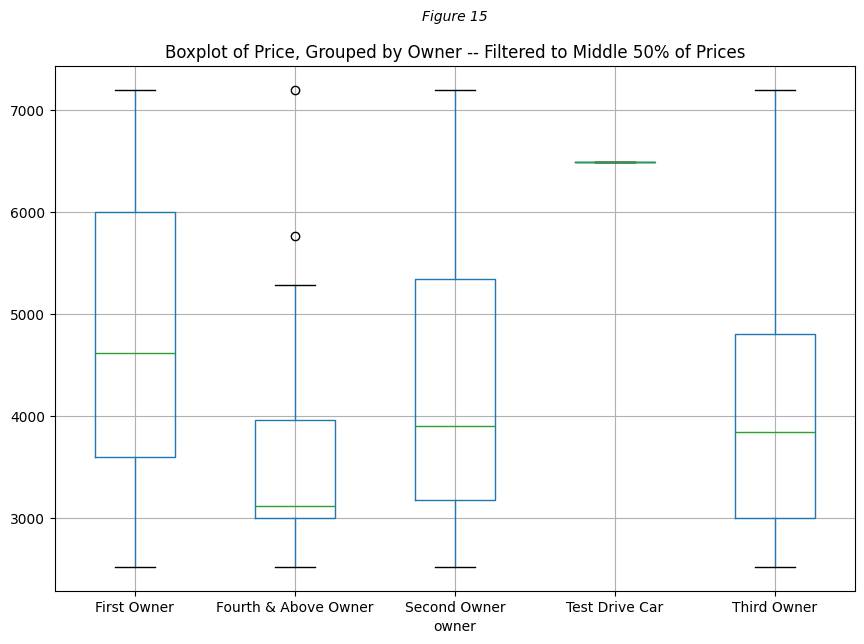

In [111]:
df_filtered_price.boxplot(by='owner', column='price_usd', figsize=(10,7))
_ = plt.title("Boxplot of Price, Grouped by Owner -- Filtered to Middle 50% of Prices")
_ = plt.suptitle("Figure 16", style = 'italic', size=10)

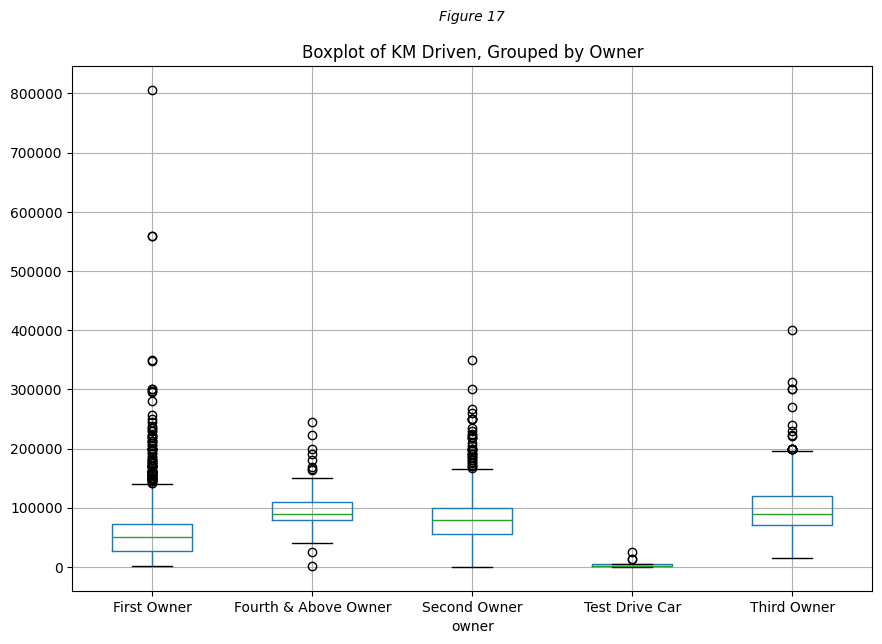

In [112]:
df.boxplot(by='owner', column='km_driven', figsize=(10,7))
_ = plt.title("Boxplot of KM Driven, Grouped by Owner")
_ = plt.suptitle("Figure 17", style = 'italic', size=10)

Here we can see that later owner cars tend to have more km_driven (Fig. 17). The median and range increases as owner does. 


# Exploring Fuel Variable
### Finding the Center, Spread, Skew, Clusters, and Extreme Values of the fuel variable

Because this data is categorical, some of these aspects don't apply in the same way. The initial analysis can be found below:



### Finding the Center

To find the center for this data, we can look at the most common occurence. Across the entire population of cars in the data set, the most common fuel required is Diesel as can be seen below.


In [160]:
center = df['fuel'].mode()
print('Mode:', center)

Mode: 0    Diesel
Name: fuel, dtype: object



### Spread, Clusters, and Extreme Values

There are 5 unique fuel types that exist in this data set, but almost 99% of cars have either Diesel or Petrol.

The rest of the fuel types make up less than 1% each, with Electric haveing only 1 car repesented in this data set (Fig. 18).


In [41]:
fule_counts = df['fuel'].nunique()
print('Fuel Counts:', fule_counts)

Fuel Counts: 5


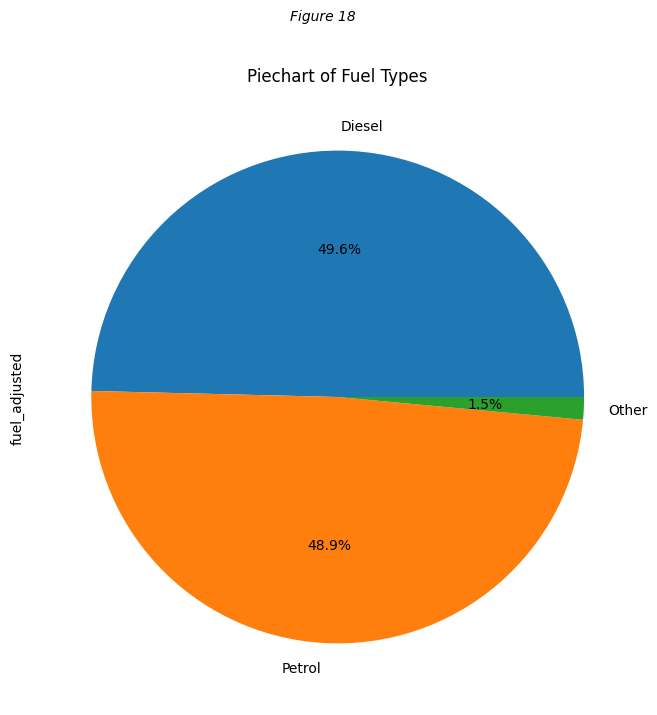

In [113]:
threshold = 0.05

fuel_percentages = df['fuel'].value_counts(normalize=True)

small_categories = fuel_percentages[fuel_percentages < threshold].index

# Replace small categories with 'Other'
df['fuel_adjusted'] = df['fuel'].replace(small_categories, 'Other')

# Plot the adjusted fuel types
fuel_counts_adjusted = df['fuel_adjusted'].value_counts()
fuel_counts_adjusted.plot(kind='pie', figsize=(12, 8), autopct='%1.1f%%')
_ = plt.title("Piechart of Fuel Types")
_ = plt.suptitle("Figure 18", style = 'italic', size=10)

In [43]:
extreme_values = df['fuel'].value_counts().sort_values()
print('Extreme Values:\n', extreme_values)

Extreme Values:
 fuel
Electric       1
LPG           23
CNG           40
Petrol      2123
Diesel      2153
Name: count, dtype: int64



### Analysis of Fuel by Model Year

Though Diesel is the most common fuel type, this seems to vary by model year. Among cars with a model year 2010 and before, they are predominantly fueled by Petrol. Among newer model years, petrol has become more predominant (Fig. 19).


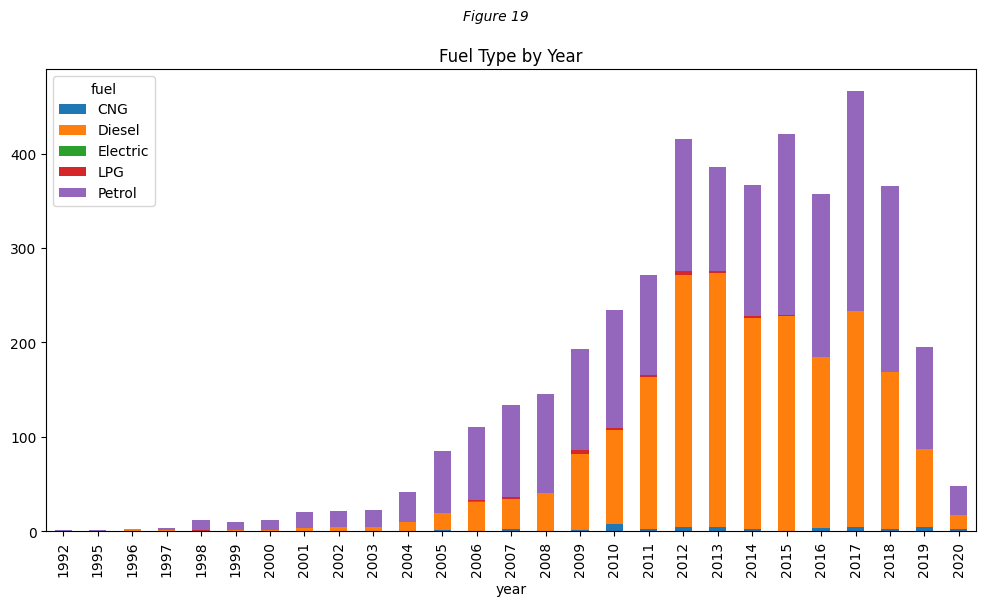

In [115]:
fuel_year_breakdown = df.groupby(['year', 'fuel']).size().unstack()
fuel_year_breakdown.plot(kind='bar', stacked=True, figsize=(12, 6))
_ = plt.title("Fuel Type by Year")
_ = plt.suptitle("Figure 19", style = 'italic', size=10)


### Analysis of Fuel by Brand

The most common brands (Maruti and Hyundai) have been mostly Petrol cars, but the rest of the brands are much more likely to be Diesel (Fig. 20).


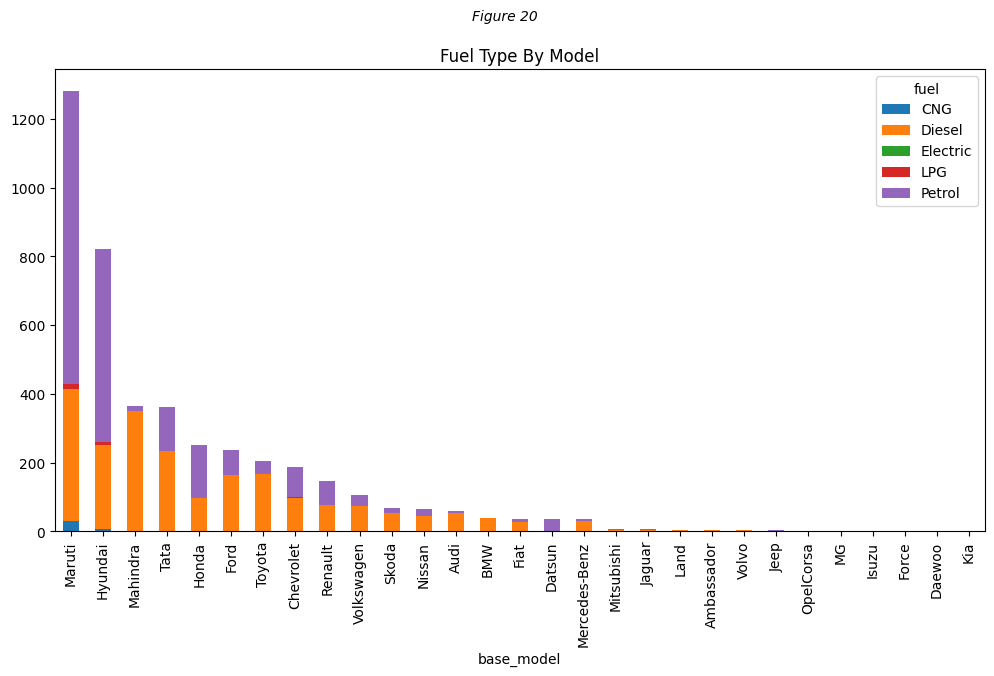

In [116]:
fuel_model_breakdown = df.groupby(['base_model', 'fuel']).size().unstack()

fuel_model_breakdown['total'] = fuel_model_breakdown.sum(axis=1)

fuel_model_breakdown = fuel_model_breakdown.sort_values('total', ascending=False)

fuel_model_breakdown = fuel_model_breakdown.drop(columns=['total'])

fuel_model_breakdown.plot(kind='bar', stacked=True, figsize=(12, 6))

_ = plt.title("Fuel Type By Model")
_ = plt.suptitle("Figure 20", style = 'italic', size=10)


## Evaluating extreme values by brand

When removing both Diesel and Petrol from the data set, we can see what brands are represented for our extreme values. What can be seen is that Maruti and Hyundai represent the majority of our extreme values, and that Toyata is the only brand that has sold an electric car (Fig. 21).


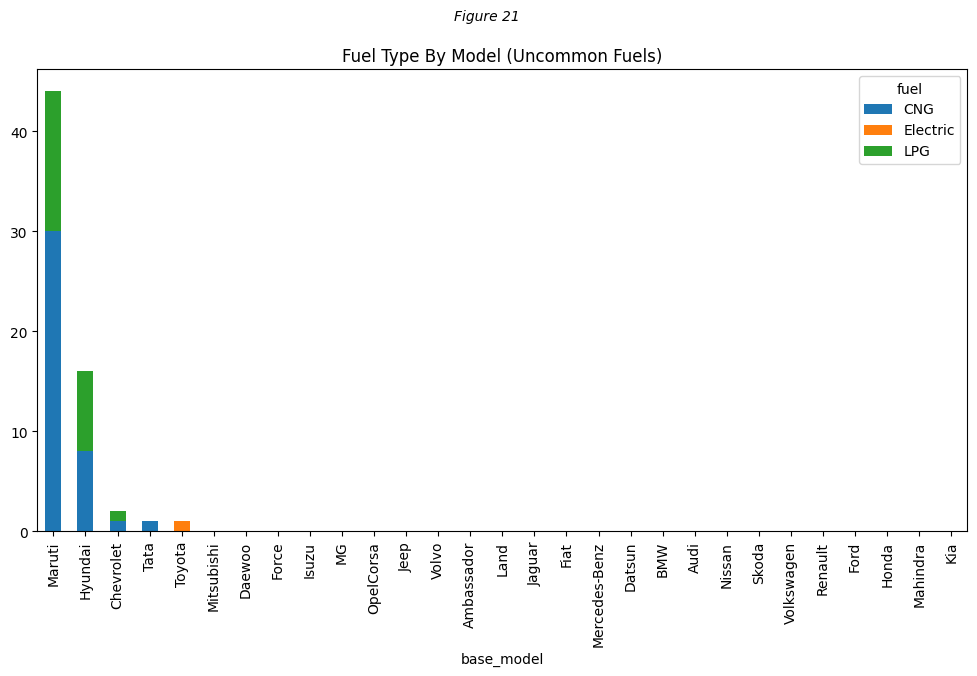

In [117]:
fuel_model_breakdown_without_D_and_P = fuel_model_breakdown.drop(columns=['Diesel', 'Petrol'])

fuel_model_breakdown_without_D_and_P['total'] = fuel_model_breakdown_without_D_and_P.sum(axis=1)

fuel_model_breakdown_without_D_and_P = fuel_model_breakdown_without_D_and_P.sort_values('total', ascending=False)

fuel_model_breakdown_without_D_and_P = fuel_model_breakdown_without_D_and_P.drop(columns=['total'])

fuel_model_breakdown_without_D_and_P.plot(kind='bar', stacked=True, figsize=(12, 6))

_ = plt.title("Fuel Type By Model (Uncommon Fuels)")
_ = plt.suptitle("Figure 21", style = 'italic', size=10)

# Exploring Car Name & Model
The dataset give a car "name" variable that includes the make & model. We have created an additional column, "base_model" that will give us just the brand name for each vehicle in the dataset.

In [118]:
brands = df.base_model.unique()
models = df.name.unique()
print("There are a total of " + str(len(brands)) + " brands in the dataset")
print("There are a total of " + str(len(models)) + " models in the dataset\n")
print("*** Top 5 most popular brands ***")
print(df.base_model.value_counts().head())
print("\n*** Top 5 most popular models ***")
print(df.name.value_counts().head())

There are a total of 29 brands in the dataset
There are a total of 1491 models in the dataset

*** Top 5 most popular brands ***
Maruti      1280
Hyundai      821
Mahindra     365
Tata         361
Honda        252
Name: base_model, dtype: int64

*** Top 5 most popular models ***
Maruti Swift Dzire VDI    69
Maruti Alto 800 LXI       59
Maruti Alto LXi           47
Maruti Alto LX            35
Hyundai EON Era Plus      35
Name: name, dtype: int64


Maruti and Hyundai are by far the most popular brand (Fig. 22), as well as Maruti having the top 4 most popular models.

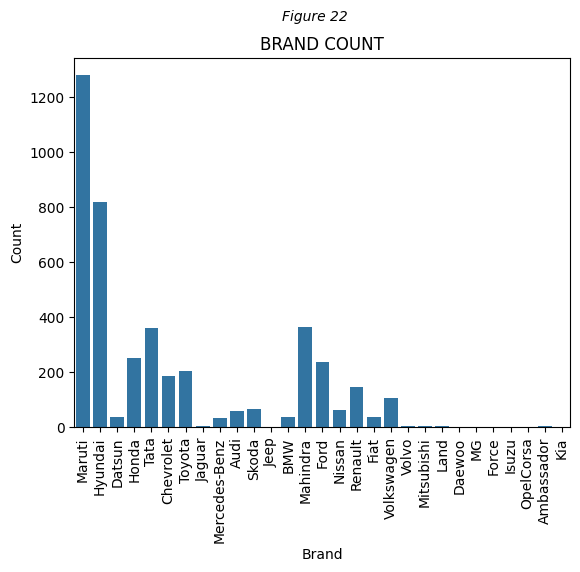

In [120]:
sns.countplot(data=df,x="base_model")
plt.xticks(rotation=90)
plt.xlabel("Brand",fontsize=10)
plt.ylabel("Count",fontsize=10)
plt.title("BRAND COUNT")
_ = plt.suptitle("Figure 22", style = 'italic', size=10)
plt.show()

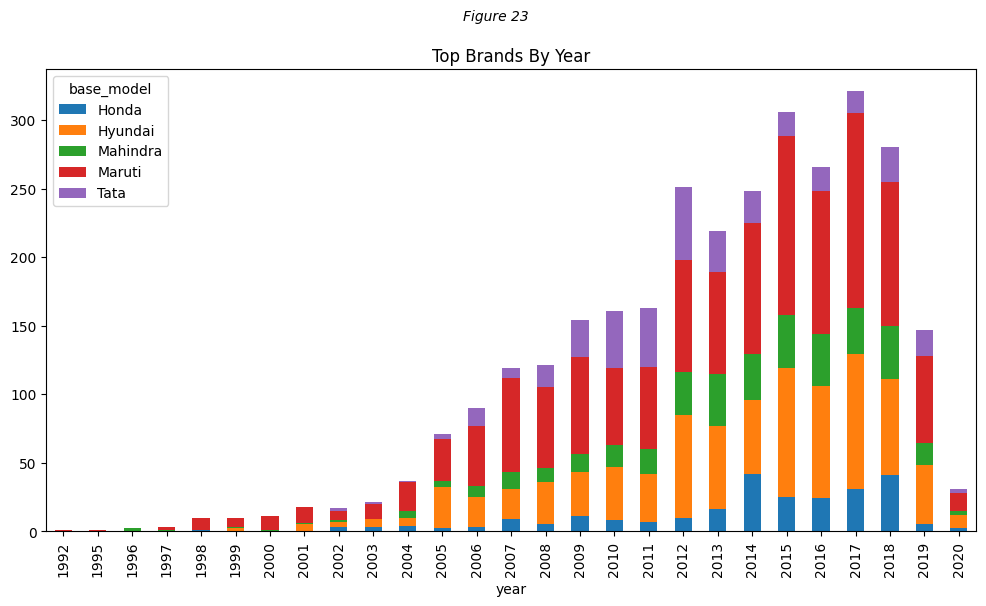

In [121]:
is_maruti = df.base_model == "Maruti"
is_hyundai = df.base_model == "Hyundai"
is_tata = df.base_model == "Tata"
is_mahindra = df.base_model == "Mahindra"
is_honda = df.base_model == "Honda"
popular_brands_df = df[is_maruti | is_mahindra | is_tata | is_hyundai | is_honda]
brands_year = popular_brands_df.groupby(['year', 'base_model']).size().unstack()
brands_year.plot(kind='bar', stacked=True, figsize=(12, 6), title="Top Brands By Year")
_ = plt.suptitle("Figure 23", style = 'italic', size=10)


The popularity of the top brands has remained relatively steady across model years, with Maruti and Hyundai consistently being the top brands each year (Fig. 23).

# Exploring the Seller_Type Variable

The seller_type variable is also categorical, so a similar analysis will be applied.

### Mode

The mode of the seller_type variable will give us the most common seller_type across the whole dataset. As we can see below, this most common seller_type is 'Individual'.

In [55]:
df['seller_type'].mode()[0]

'Individual'

### Unique Seller_Type Values

As we can see below, there are three unique seller_type values. These are 'Individual', 'Dealer', and 'Trustmark Dealer'.

In [56]:
df['seller_type'].nunique()

3

These seller types are not evenly represented in the dataset, however. As is made clear below, a clear hierarchy can be established: individual is the most common, dealer ranks second, and trustmark dealer is a clear third.

The individual seller type accounts for 74.7 percent of the cars in the dataset. The dealer seller type applies to 22.9 percent of the cars in the dataset. Finally, the remaining 2.4 percent had a seller type of trustmark dealer (Fig. 24).

In [123]:
seller_counts = df['seller_type'].value_counts()
seller_counts

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

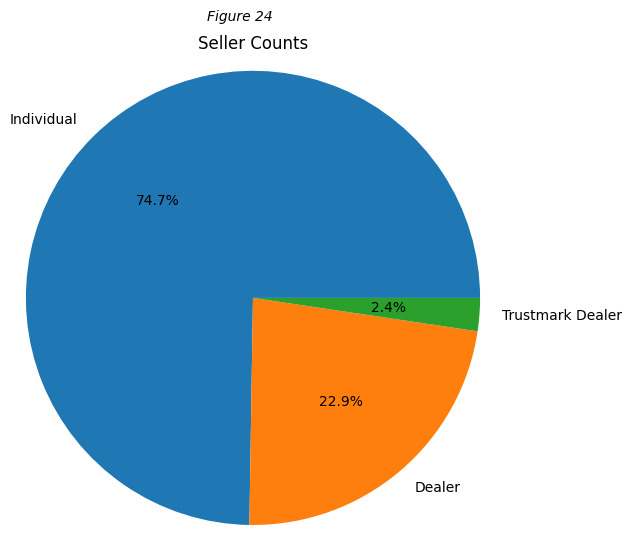

In [128]:
plt.pie(seller_counts, autopct = '%1.1f%%', labels = seller_counts.keys(), radius = np.sqrt(2))
plt.tight_layout()
plt.rcParams['axes.titley'] = 1.1    # y is in axes-relative coordinates.
_ = plt.title("Seller Counts")
_ = plt.suptitle("Figure 24", style = 'italic', size=10, y=1.1,x=.4)
plt.show()

### Seller_Type by Model Year

In the dataset, the individual seller type is the most frequent in each model year represented. For 2013 and 2017, the dealer seller type reached at least half of the amount of representation of the individual seller type, but individual remained clearly the most prevalent.

The trustmark dealer seller type does not appear at all until model year 2013, and it is absent after model year 2018. It is a clear third-most prevalent seller type in each year where it even appears in the dataset (Fig. 25). 

In [130]:
seller_year = df.groupby(['year', 'seller_type']).size().unstack()

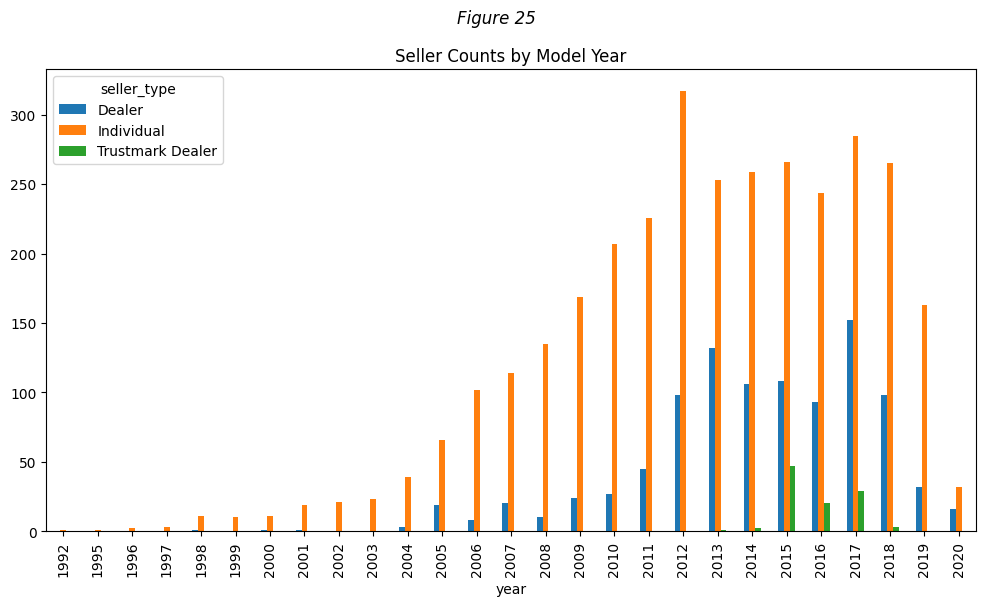

In [134]:
seller_year.plot(kind = 'bar', figsize = (12, 6), legend = True)
plt.rcParams['axes.titley'] = 1    # y is in axes-relative coordinates.
_ = plt.title("Seller Counts by Model Year")
_ = plt.suptitle("Figure 25", style = 'italic')

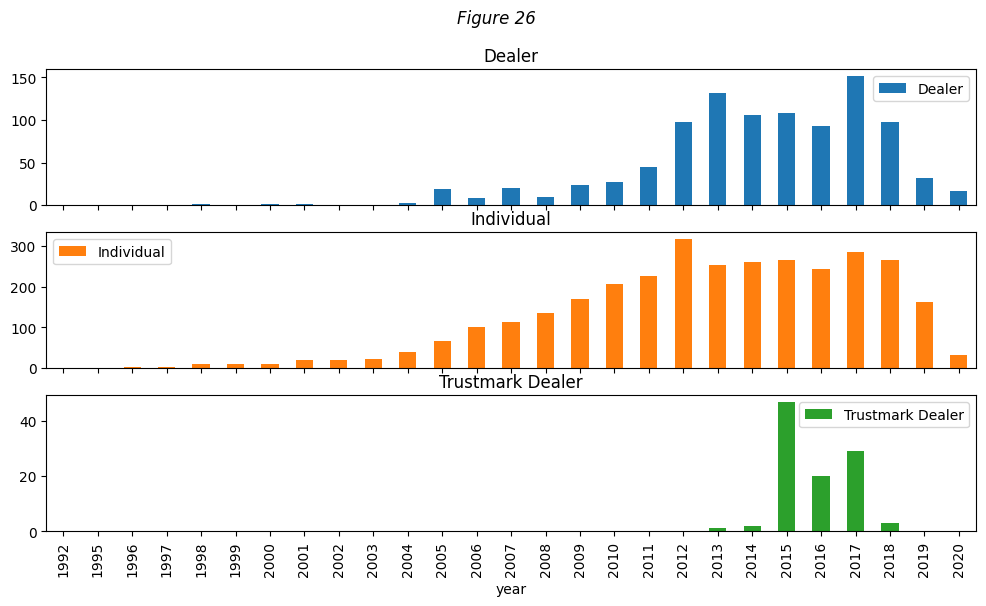

In [136]:
seller_year.plot(kind = 'bar', subplots = True, figsize = (12, 6), legend = True)
_ = plt.suptitle("Figure 26", style = 'italic')

### Seller_Type By Owner

Of interest is the prevalence of each seller type by the owner variable (Fig. 27).

Among the 17 cars with an owner value of 'Test Drive Car', all 17 have a seller type of dealer. This makes logical sense.

Additionally, in the dataset, for each step further removed from the original owner, the seller type of dealer becomes less common and individual becomes more common. For instance, for 29.8 percent of cars with an owner value of 'First Owner", the seller type is dealer. However, this value drops to 11.0 percent for cars with an owner value of 'Second Owner', 3.0 percent for cars with an owner value of 'Third Owner', and 2.5 percent for cars with an owner value of 'Fourth & Above Owner.'

We can also see that the seller type of 'Trustmark Dealer' only appears among cars with owner values of either 'First Owner' or 'Second Owner.'

I referenced this link for assistance with the custom sorting of the pie charts: https://ze1598.medium.com/custom-sort-a-pandas-dataframe-with-pd-categorical-c4eec8343957

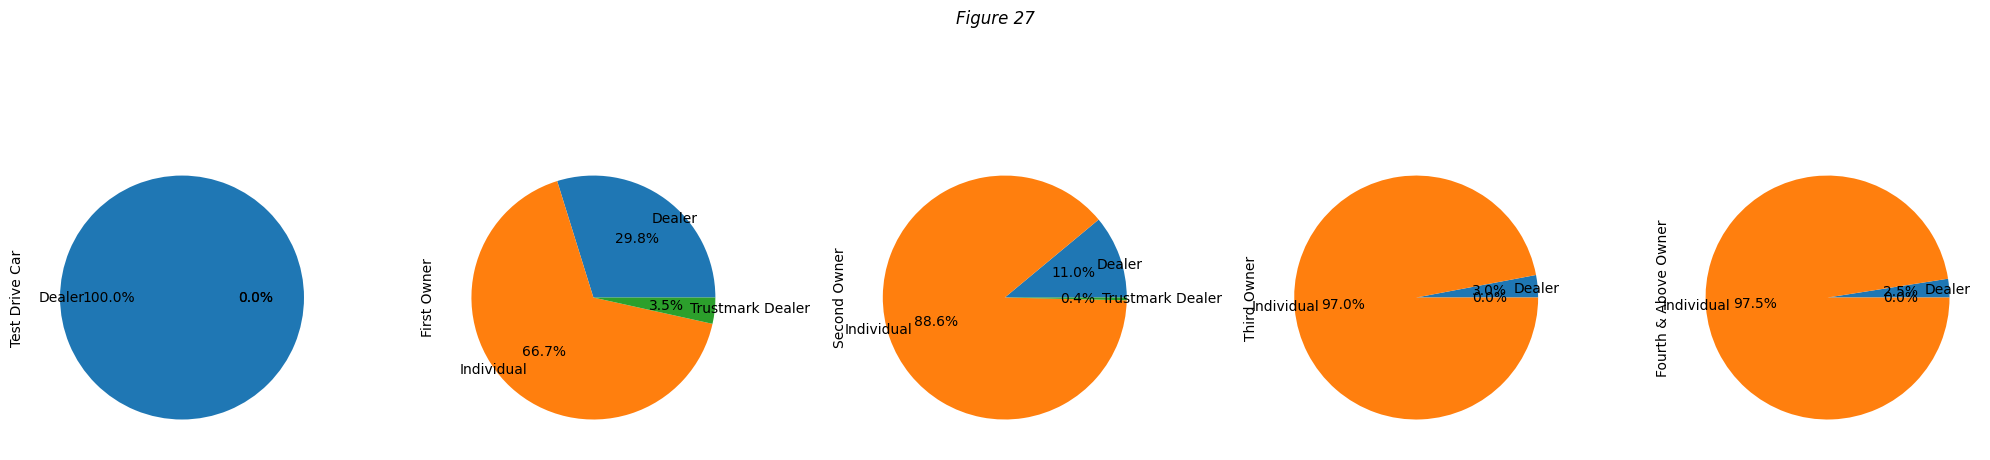

In [138]:
df['owner'] = pd.Categorical(df['owner'], ["Test Drive Car", "First Owner",
                                           "Second Owner", "Third Owner", "Fourth & Above Owner"])
df = df.sort_values("owner")
seller_owner = df.groupby(['seller_type', 'owner'], sort = False).size().unstack()
seller_owner.plot(kind = 'pie', subplots = True, autopct = '%1.1f%%',
                  figsize = (20, 6), legend = False, labeldistance = 0.8)
plt.tight_layout()
_ = plt.suptitle("Figure 27", style = 'italic')

### km_driven By Seller_Type 

The below violin plot shows the distributions of the kilometers driven of cars for each seller type (Fig. 28).

For the relatively small sample of cars in the dataset with the trustmark dealer seller type, the distribution has a clear mode at around 50000 km_driven, but it appears to be bimodal with a center with a smaller value around 10000 km as well. 

For the other two seller types, the distributions are clearly right-skewed, as expected given the overall distribution of the km_driven is right-skewed.

There does not appear to be a notable difference between the centers of the dealer and individual distributions, as both appear to be centered in the vicinity of 65000 km driven, although the individual seller type does have a slightly higher median km_driven value than the other two seller types.

The seller_type with the widest range of km_driven values is dealer, and the smallest range of km_driven values belongs to trustmark dealer.

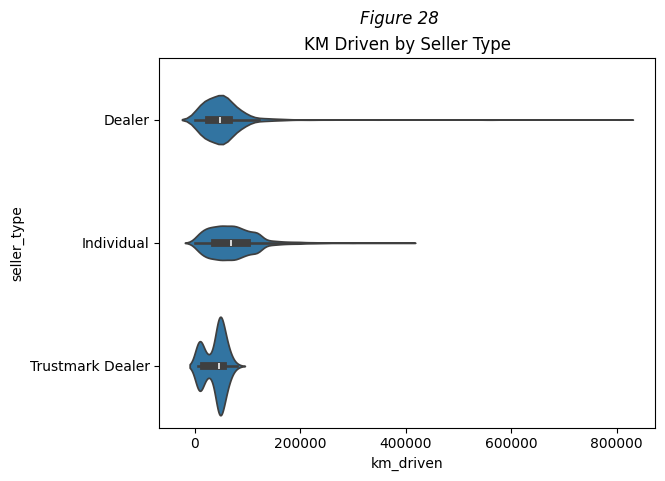

In [140]:
sns.violinplot(data = df, x = "km_driven", y = "seller_type")
_ = plt.title("KM Driven by Seller Type")
_ = plt.suptitle("Figure 28", style = 'italic')

### Price_USD By Seller_Type 

The below violin plot shows the distributions of the prices of cars for each seller type (Fig. 29).

For the relatively small sample of cars in the dataset with the trustmark dealer seller type, the distribution has a clear mode but is arguably bimodal. 

For the other two seller types, the distributions are clearly right-skewed, as expected given the overall distribution of the price variable is right-skewed.

There does not appear to be a notable difference between the centers of the distributions, although further investigation could be conducted.

The seller_type with the widest range of prices is dealer, and the smallest range of prices belongs to trustmark dealer. The highest and lowest price values in the dataset also appear to belong to cars with the dealer seller type.

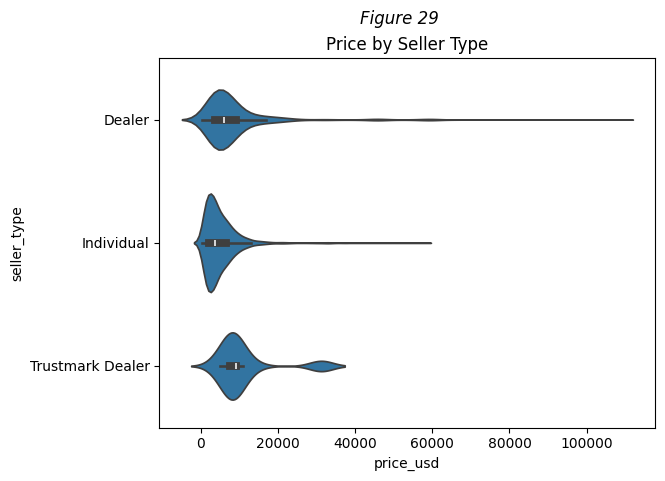

In [141]:
sns.violinplot(data = df, x = "price_usd", y = "seller_type")
_ = plt.title("Price by Seller Type")
_ = plt.suptitle("Figure 29", style = 'italic')

# Exploring the Transmission Variable

The transmission variable is also categorical, so a similar analysis will be applied.

### Mode

The mode of the transmission variable will give us the most common transmission type across the whole dataset. As we can see below, this most common transmission is 'Manual'.

In [65]:
df['transmission'].mode()[0]

'Manual'

### Unique Transmission Values

As we can see below, there are two unique transmission values. These are 'Manual' and 'Automatic'.

In [67]:
df['transmission'].nunique()

2

These transmission types are not evenly represented in the dataset, however. A large majority of the cars in the dataset have a manual transmission, and a minority have an automatic transmission.

The manual transmission type accounts for 89.7 percent of the cars in the dataset. By contrast, the automatic transmission type applies to just 10.7 percent of the cars in the dataset.

In [143]:
transmission_counts = df['transmission'].value_counts()
transmission_counts

Manual       3892
Automatic     448
Name: transmission, dtype: int64

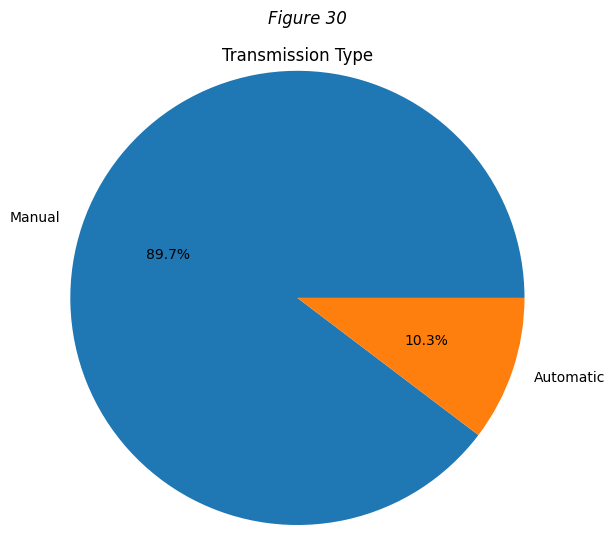

In [147]:
plt.pie(transmission_counts, autopct='%1.1f%%', labels = transmission_counts.keys(), radius = np.sqrt(2))
plt.tight_layout()
plt.rcParams['axes.titley'] = 1.07    # y is in axes-relative coordinates.
_ = plt.title("Transmission Type")
_ = plt.suptitle("Figure 30", style = 'italic', y = 1.1)
plt.show()

### Transmission by Model Year

In the dataset, the manual transmission type is the most frequent in each year represented. In the late 2010s models, the automatic transmission type became better represented in the dataset, with cars with automatic transmissions peaking in frequency in the dataset in model year 2017 (Fig. 31).

Interestingly, the automatic transmission type does not appear in the dataset until the year 2006.

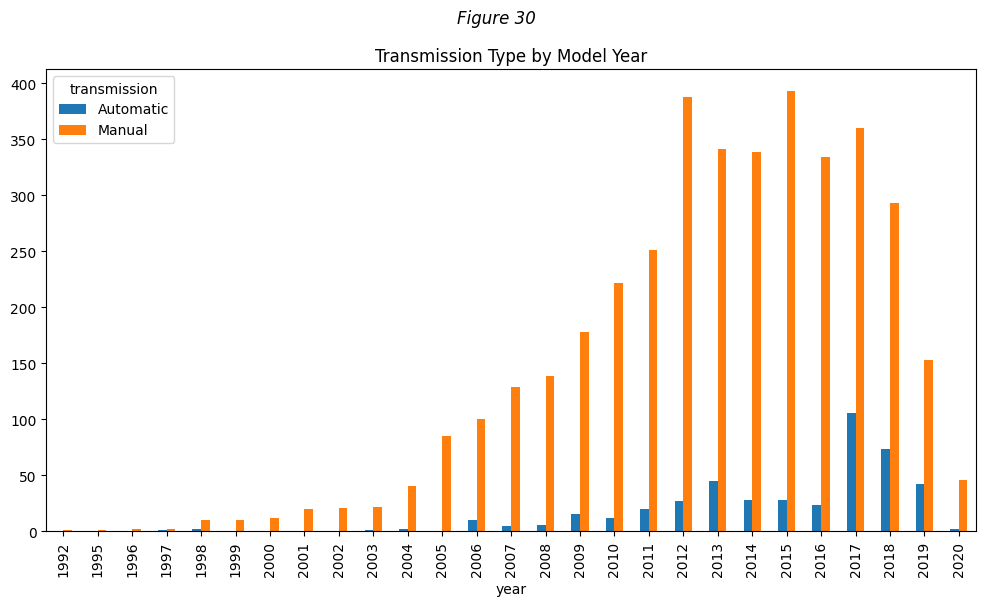

In [149]:
transmission_year = df.groupby(['year', 'transmission']).size().unstack()
transmission_year.plot(kind = 'bar', figsize = (12, 6))
plt.rcParams['axes.titley'] = 1   # y is in axes-relative coordinates.
_ = plt.title("Transmission Type by Model Year")
_ = plt.suptitle("Figure 31", style = 'italic')

### km_driven by Transmission and Seller_Type

The below barplot shows the means and standard deviations of the kilometers driven of cars for each seller type and transmission.

For the relatively small sample of cars in the dataset with the trustmark dealer seller type, automatic transmission cars on average have slightly more km driven than manual transmission cars. However, for the other two seller types with larger sample sizes, the manual transmission cars are the ones with the higher km_driven values on average.

The standard deviations of km_driven for the cars in the dataset with automatic transmissions appear to be lower than those far cars with manual transmissions for the dealer and trustmark dealer seller types. This does not appear to be the case for cars with the individual seller type.

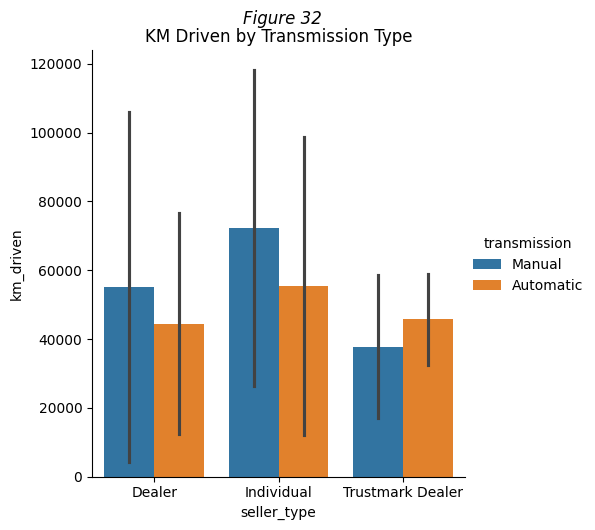

In [152]:
sns.catplot(data = df, kind = "bar",
            x = "seller_type", y = "km_driven", hue = "transmission", errorbar = "sd")
_ = plt.title("KM Driven by Transmission Type")
_ = plt.suptitle("Figure 32", style = 'italic', y = 1.05)

### Price_USD by Transmission and Seller_Type

The below barplot shows the means and standard deviations of the prices of cars for each seller type and transmission.

For each seller type, we can see that the sample mean prices for cars with automatic transmissions are higher than those for cars with manual transmissions. Indeed, the differences appear to be stark, with the difference being around 10000 or more USD regardless of seller type.

However, the sample standard deviations for the cars with automatic transmissions are also much higher than those for cars with manual transmissions.

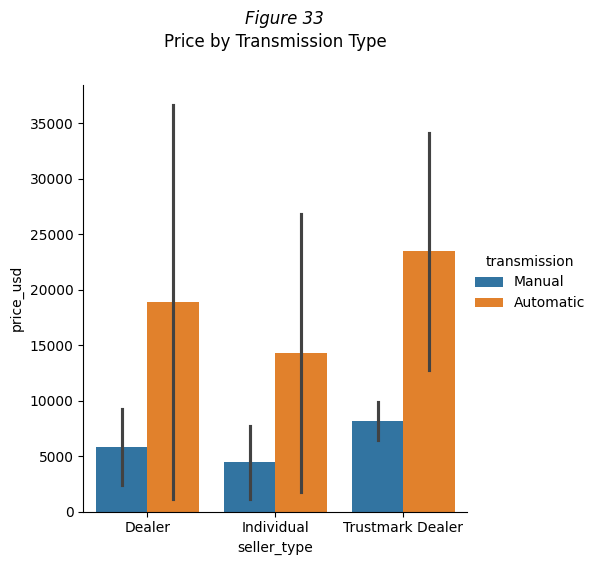

In [155]:
sns.catplot(data = df, kind = "bar",
    x = "seller_type", y = "price_usd", hue = "transmission", errorbar = "sd")
plt.rcParams['axes.titley'] = 1.07    # y is in axes-relative coordinates.
_ = plt.title("Price by Transmission Type")
_ = plt.suptitle("Figure 33", style = 'italic', y = 1.12)

### Seller_Type by Transmission

The below pie charts show the frequencies of each seller_type by the transmission type (Fig. 34).

For cars with automatic transmissions, the dealer and individual seller types are approximately equal in prevalence. Among this sample of cars, 48.4 percent have a seller_type of dealer, 47.3 percent have a seller_type of individual, and the remaining 4.2 percent have a seller_type of trustmark dealer.

However, the sample proportions are much different among cars with manual transmissions. In this group, 77.9 percent have the individual seller_type, whereas just 20.0 percent and 2.1 percent have the dealer and trustmark dealer seller_types, respectively.

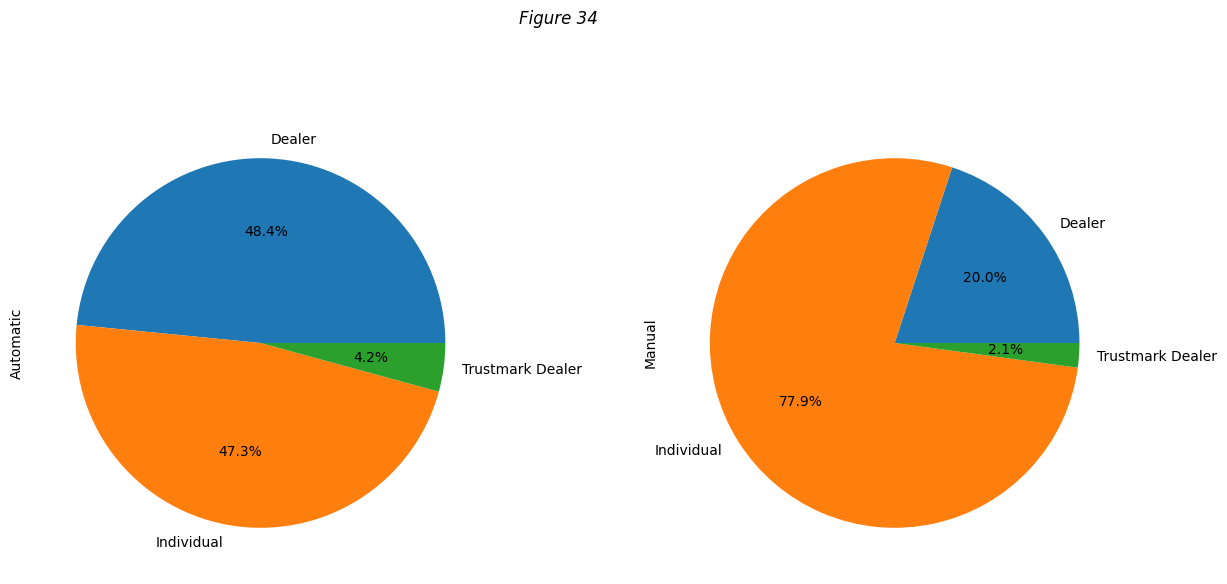

In [159]:
seller_transmission = df.groupby(['seller_type', 'transmission']).size().unstack()
seller_transmission.plot(kind='pie', subplots = True, figsize=(15, 6), autopct='%1.1f%%', legend = False)

_ = plt.suptitle("Figure 34", style = 'italic', y = 1.05)